# Image Analysis and Transformations - OpenCV

## Written by: Rodrigo Escandon

# Executive Summary

This notebook displays steps to load, analyze and transform images using OpenCV and Matplotlib. Consider these good pre-processing steps prior to inputting images in a Machine Learning model.

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import tqdm

Text(0.5,1,'Dog & Bike')

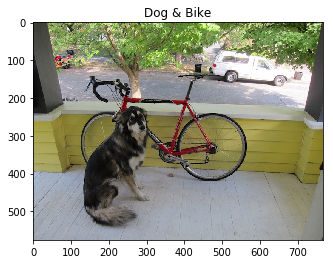

In [2]:
#Loading image and displaying
image=cv.imread('.\\dog.jpg')
image=cv.cvtColor(image,cv.COLOR_BGR2RGB)
plt.imshow(image)
plt.title('Dog & Bike')

In [3]:
#Shape of image (height,width,depth)
print (image.shape)

(576, 768, 3)


In [4]:
print ('Height of Image',image.shape[0],'pixels')
print ('Width of Image',image.shape[1],'pixels')

Height of Image 576 pixels
Width of Image 768 pixels


In [5]:
#BGR Values for the first 0,0 pixel
B,G,R=image[0,0]
print(B,G,R)

57 58 50


Text(0.5,1,'Gray_Dog & Bike')

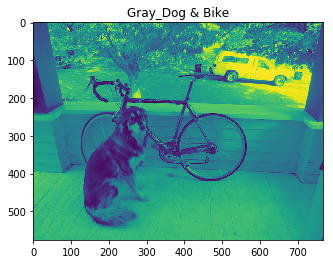

In [7]:
#Converting image into gray colors
image_gray=cv.cvtColor(image,cv.COLOR_BGR2GRAY)
plt.imshow(image_gray)
plt.title('Gray_Dog & Bike')

In [8]:
#Shape of image (height,width)
print (image_gray.shape)

(576, 768)


In [9]:
print ('Height of Image',image_gray.shape[0],'pixels')
print ('Width of Image',image_gray.shape[1],'pixels')

Height of Image 576 pixels
Width of Image 768 pixels


In [10]:
image_gray[0,0]

55

<function matplotlib.pyplot.show>

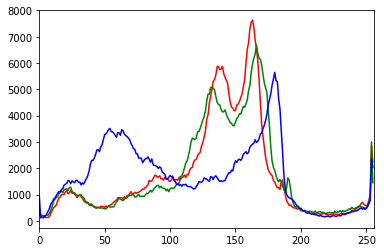

In [11]:
#Histogram to see the range of R,G,B
color=('r','g','b')

for i, col in enumerate(color):
    hist=cv.calcHist([image],[i],None,[256],[0,256])
    plt.plot(hist,color=col)
    plt.xlim([0,256])
plt.show

Text(0.5,1,'Bright_Dog & Bike')

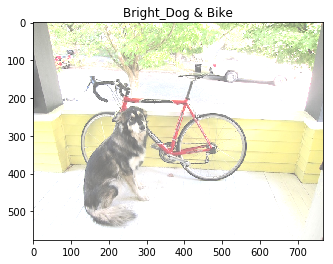

In [12]:
#Brightening Image
mat=np.ones(image.shape,dtype='uint8')*115
add=cv.add(image,mat)
plt.imshow(add)
plt.title('Bright_Dog & Bike')

Text(0.5,1,'Dark_Dog & Bike')

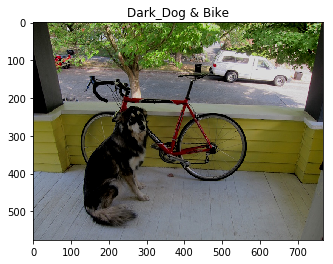

In [13]:
#Darkening Image
mat=np.ones(image.shape,dtype='uint8')*35
sub=cv.subtract(image,mat)
plt.imshow(sub)
plt.title('Dark_Dog & Bike')

Text(0.5,1,'Light Gray_Dog and Bike')

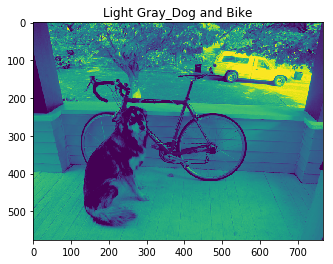

In [14]:
#Converting image into gray colors
image_light_gray=cv.cvtColor(sub,cv.COLOR_BGR2GRAY)
plt.imshow(image_light_gray)
plt.title('Light Gray_Dog and Bike')

Text(0.5,1,'Line')

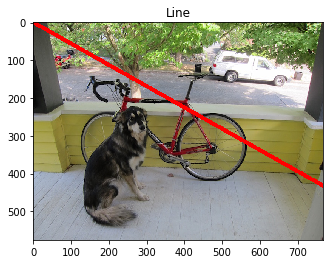

In [16]:
#Adding Lines
line=cv.line(image.copy(),(0,0),(1920,1080),(255,0,0),10)
plt.imshow(line)
plt.title('Line')

Text(0.5,1,'Poly')

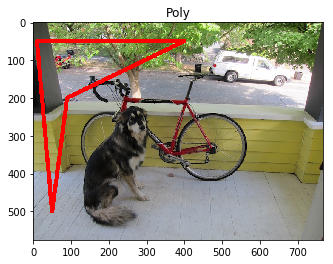

In [17]:
#Adding Polygons
pts=np.array([[10,50],[400,50],[90,200],[50,500]],np.int32)
pts=pts.reshape((-1,1,2))
poly=cv.polylines(image.copy(),[pts],True,(255,0,0),10)
plt.imshow(poly)
plt.title('Poly')

Text(0.5,1,'Edge_Canny')

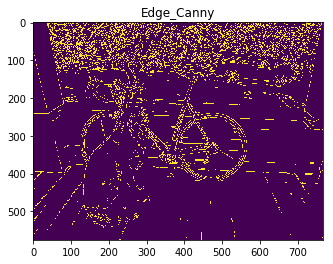

In [18]:
# Edge detection using Canny
ed_cny=cv.Canny(image_gray,110,180)
plt.imshow(ed_cny)
plt.title('Edge_Canny')

Number of Contours found=1491


Text(0.5,1,'Edges_After_Contouring')

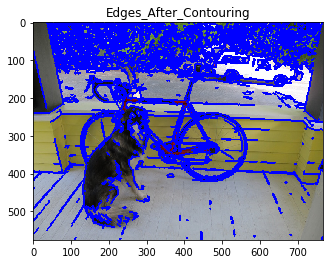

In [19]:
#Counting the number of contours within this image and superimposing them on original image
cont,hier=cv.findContours(ed_cny.copy(),cv.RETR_EXTERNAL,cv.CHAIN_APPROX_NONE)
print('Number of Contours found='+str(len(cont)))
draw=cv.drawContours(image.copy(),cont,-1,(0,0,255),3)
plt.imshow(draw)
plt.title('Edges_After_Contouring')

100%|█████████████████████████████████████| 796/796 [00:00<00:00, 50947.89it/s]


Text(0.5,1,'Approx_Contour')

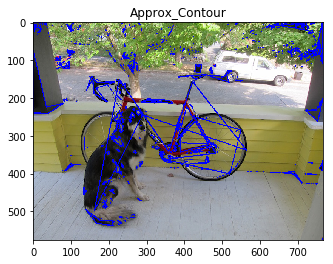

In [20]:
#Contour Approximation
ret,thr=cv.threshold(image_gray.copy(),60,255,cv.THRESH_BINARY_INV)
contours,hierarchy=cv.findContours(thr.copy(),cv.RETR_LIST,cv.CHAIN_APPROX_NONE)
image1=image.copy()

#Iterate through each contour and compute the approx contour
for i in tqdm.tqdm(contours):
    acc=0.03*cv.arcLength(i,True)
    app=cv.approxPolyDP(i,acc,True)
    draw=cv.drawContours(image1,[app],0,(0,0,255),2)   
plt.imshow(draw)
plt.title('Approx_Contour')

Text(0.5,1,'Approx_Contour(Hull)')

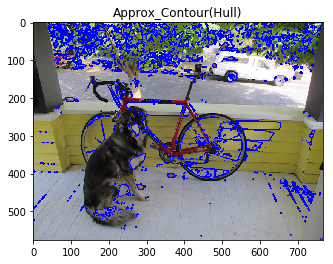

In [21]:
#Contour Approximation Convex Hull
retu,thre=cv.threshold(image_gray,120,255,0)
contrs,hier=cv.findContours(thre.copy(),cv.RETR_LIST,cv.CHAIN_APPROX_NONE)
n=len(contrs)-1
contrs=sorted(contrs,key=cv.contourArea,reverse=False)[:n]
image1=image.copy()
for i in contrs:
    hull=cv.convexHull(i)
    draw=cv.drawContours(image1,[hull],0,(0,0,255),2)
plt.imshow(draw)
plt.title('Approx_Contour(Hull)')